In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

# Exercise
鋸齒信號的波形從-1線性上升到1，然後下降到-1並重複。 參見http://en.wikipedia.org/wiki/Sawtooth_wave

編寫一個名為SawtoothSignal的類，該類擴展Signal並提供評估以評估鋸齒信號。

計算鋸齒波的頻譜。 諧波結構與三角波和方波相比如何？

Solution
我的解決方案基本上是TriangleSignal的簡化版本。

In [2]:
class SawtoothSignal(thinkdsp.Sinusoid):
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

聽起來是這樣的：

In [3]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

這是頻譜的樣子：

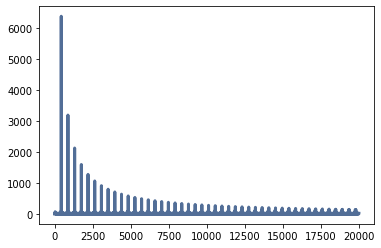

In [4]:
sawtooth.make_spectrum().plot()

與方波相比，鋸齒波下降得類似，但是它包括偶數和奇數諧波。 請注意，我必須削減方波的幅度以使其具有可比性。

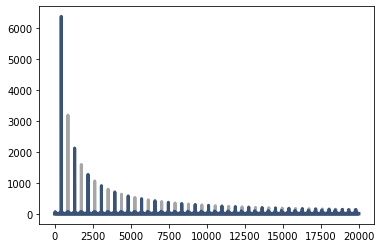

In [5]:
sawtooth.make_spectrum().plot(color='gray')
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()

與三角波相比，鋸齒的下降速度不那麼快。

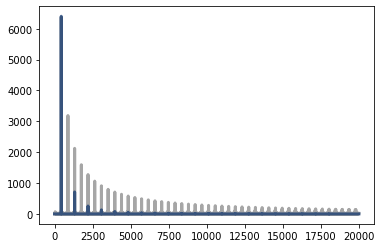

In [6]:
sawtooth.make_spectrum().plot(color='gray')
triangle = thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()

具體來說，三角波的諧波與$ 1 / f ^ 2 $成比例地下降，而鋸齒狀的下降與$ 1 / f $類似。